In [1]:
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 189.3 MB 3.0 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 2.7 MB 554 kB/s eta 0:00:01
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
     |████████████████████████████████| 9.1 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 668 kB/s eta 0:00:01
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached protobuf-4.24.2-cp37-abi3-ma

In [2]:
!pip3 list

Package                        Version
------------------------------ -----------
absl-py                        1.4.0
altgraph                       0.17.2
appnope                        0.1.3
asttokens                      2.2.1
astunparse                     1.6.3
backcall                       0.2.0
boto3                          1.28.36
botocore                       1.31.36
cachetools                     5.3.1
certifi                        2023.7.22
charset-normalizer             3.2.0
comm                           0.1.4
debugpy                        1.6.7.post1
decorator                      5.1.1
executing                      1.2.0
flatbuffers                    23.5.26
future                         0.18.2
gast                           0.4.0
google-auth                    2.22.0
google-auth-oauthlib           1.0.0
google-pasta                   0.2.0
grpcio                         1.57.0
h5py                           3.9.0
ibm-cos-sdk                    2.11.0
ibm-cos-s

In [3]:
import tensorflow as tf

In [4]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"nF2BU5KRYc9z2ZnMhNuzVcghozZaznLHue1h5h0crcVk"
}

In [5]:
client=APIClient(wml_credentials)

In [6]:
client

In [7]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------  ------------------------
ID                                    NAME        CREATED
f9a08d7a-1730-4d9f-b753-50c531422a76  QuietPlace  2023-08-29T19:42:13.335Z
------------------------------------  ----------  ------------------------


,ID,NAME,CREATED
0,f9a08d7a-1730-4d9f-b753-50c531422a76,QuietPlace,2023-08-29T19:42:13.335Z


In [8]:
space_uid="f9a08d7a-1730-4d9f-b753-50c531422a76"

In [9]:
client.set.default_space(space_uid)

'SUCCESS'

In [10]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch-onnx_rt22.2-py3

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [11]:
software_space_uid=client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")
software_space_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [16]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [14]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [15]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation_3 (Activation)   (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 75, 23, 70, 128)   0         
 g3D)                                                            
                                                                 
 conv3d_4 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_4 (Activation)   (None, 75, 23, 70, 256)   0         
                                                      

In [18]:
model.save("lipbud.h5")

/Users/chaitanyatandon/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
!tar -zcvf lipbud.tgz lipbud.h5

a lipbud.h5


In [74]:
model_details=client.repository.store_model(model="lipbud.tgz",meta_props={
    client.repository.ModelMetaNames.NAME:"lipbud.h5",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.9",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [75]:
model_id=client.repository.get_model_id(model_details)
model_id

'928ca4b3-02aa-4c90-9eaf-72dc26a15ff8'

In [77]:
client.repository.download(model_id,'lipbud3.tgz')

Successfully saved model content to file: 'lipbud3.tgz'


'/Users/chaitanyatandon/Desktop/LIPBUDDIES/lipbud3.tgz'

In [78]:
model_id=client.repository.get_model_id(model_details)
model_id

'928ca4b3-02aa-4c90-9eaf-72dc26a15ff8'

In [25]:
model.load_weights('models/checkpoint')

In [26]:
model.save("lipbud.h5")

/Users/chaitanyatandon/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=157e36ac-0282-4772-8985-99104cd9a1a2
To: /Users/chaitanyatandon/Desktop/LIPBUDDIES/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:31<00:00, 3.02MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [28]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [30]:
import os

import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

ModuleNotFoundError: No module named 'matplotlib'

In [31]:
!pip3 install opencv-python matplotlib imageio gdown tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)
     |████████████████████████████████| 7.3 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 2.0 MB/s eta 0:00:01
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
     |████████████████████████████████| 66 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 142 kB 3.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [32]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [33]:
import gdown

In [35]:
model.load_weights('models/checkpoint')

In [36]:
model.save("lipbud.h5")

/Users/chaitanyatandon/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation_3 (Activation)   (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 75, 23, 70, 128)   0         
 g3D)                                                            
                                                                 
 conv3d_4 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_4 (Activation)   (None, 75, 23, 70, 256)   0         
                                                      

In [41]:
!tar -zcvf lipbud.tgz lipbud.h5

a lipbud.h5


In [42]:
model_details=client.repository.store_model(model="lipbud.tgz",meta_props={
    client.repository.ModelMetaNames.NAME:"lipbud.h5",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.9",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [43]:
model_id=client.repository.get_model_id(model_details)
model_id

'eed6f60c-6294-4b7d-9b25-71d40fa5e2e6'

In [44]:
client.repository.download(model_id,'lipbud2.tgz')

Successfully saved model content to file: 'lipbud2.tgz'


'/Users/chaitanyatandon/Desktop/LIPBUDDIES/lipbud2.tgz'

In [45]:
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask , request, render_template

ModuleNotFoundError: No module named 'flask'

In [46]:
!pip3 install flask

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 96 kB 508 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 3.6 MB/s eta 0:00:01
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [47]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [48]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [49]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [50]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [51]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [52]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    #file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [56]:
test_path = '\\Users\\Coding\\Desktop\\Projects\\Lipsense\\LipSyncer\\data\\s1\\bbal6n.mpg'

In [58]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [59]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

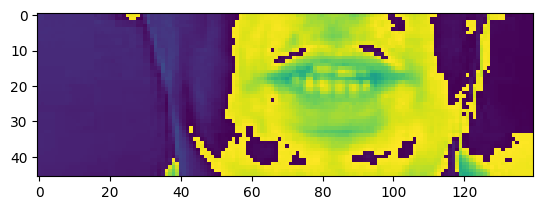

In [60]:
plt.imshow(frames[40])

In [61]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [62]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [63]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [64]:
from matplotlib import pyplot as plt

In [66]:
sample = load_data(tf.convert_to_tensor('\\Users\\Coding\\Desktop\\Projects\\Lipsense\\LipSyncer\\data\\s1\\bras9a.mpg'))


In [67]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [68]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 3s 3s/step


In [69]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [70]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [71]:
model.save("lipbud.h5")

/Users/chaitanyatandon/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
